### DBSCAN

In the following notebook we're going to learn about unsupervised algorithm: DBSCAN (Density Based Spatial Clustering of Application with Noise). 

This clustering method is commonly used in machine learning to discover clusters of arbitrary shape out of their density. Its success mainly come from the advantages that this method offers compared to other techniques such as KMeans or Agglomerative Clustering, in fact DBSCAN:

* Autonomously discovers the clusters with arbitrary shapes, hence it does not require a specific *K*;
* It's efficient on large datasets,
* Only requires few params*epsilon* and *min_sample*. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style = "whitegrid")
from sklearn import datasets
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler

#run after checking the code
import warnings
warnings.filterwarnings("ignore")

As for other clustering methods, scaling the data improve the efficiency of the algorithm, hence as first step we'll normalize our randomly generated value. Since the data, in this case doesn't require preprocessing ,we can create 2 different scaled X and apply different params on DBSCAN to see how it behaves.

In [2]:
X, y = make_circles(n_samples = 750, factor = 0.2, noise = 0.1, random_state = 2)

X = MinMaxScaler().fit_transform(X)
X1 = MinMaxScaler().fit_transform(X)

Even if DBSCAN only requires two input parameters, their impact on the output is very relevant.

**Epsilon** represents the threshold of similarity between 2 given values, this means that if the distance between 2 points is below *eps* , these are considered *neighbors*.

**Min_Sample** indicates the number of neighbors requested for a given point to be considered *core* *

In [3]:
db = DBSCAN(eps = 0.05, min_samples = 10).fit(X)
db1 = DBSCAN(eps = 0.07, min_samples = 10).fit(X1)

labels = db.labels_
labels1 = db1.labels_

DBSCAN iterates through every value and based on the eucledian distance registered and the parameters we set, it creates 3 different type of points: 

* **Core point**, when it has at least as many neighbors as the min_samples (>= min_samples) and the distance between them is under the epsilon;
* **Border point**, when it hasn't enough neighbors ( < min_samples ) but it still respecting the epsilon set. These values are included in the closest core point's cluster;
* **Noise point**, when it's not respecting the params we set. <ins>This value won't belong to any of the clusters</ins>.



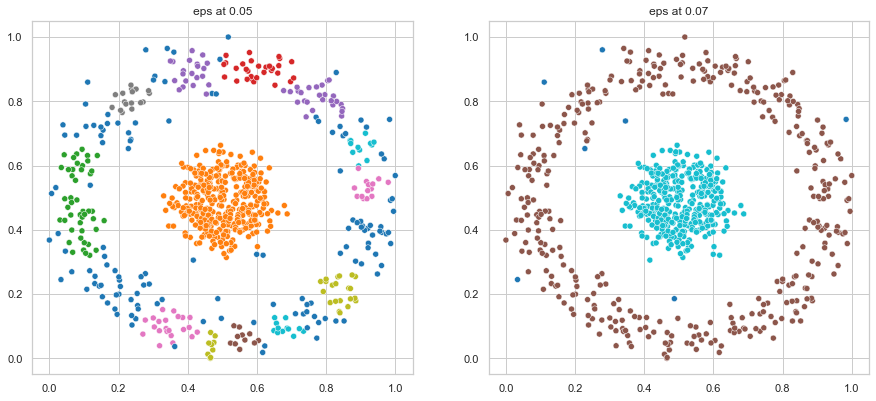

In [4]:
fig, axes = plt.subplots(1,2, figsize = (15, 6.5))
axes[0].set_title("eps at 0.05")
sns.scatterplot(x = X[:,0], y = X[:,1], c = labels, ax = axes[0], cmap = "tab10")
axes[1].set_title("eps at 0.07")
sns.scatterplot(x = X1[:,0], y = X1[:,1], c = labels1, ax = axes[1], cmap = "tab10")
plt.show()

See how in the first plot, with an epsilon value of 0.05 the algorithm identifies 9 clusters and several anomalies (blue points), or values whose distance do not allow to consider them as neighbors. 

In the second plot, however, with a slightly higher epsilon of 0.07 the result is far better, leaving only few values as outliers.

So if the algorithm is so sensitive to the epsilon parameter, how can we guess it?

Easy, we don't have to. In fact using NearestNeighbor from the library sklearn we can discover the 2 points and the distance between them. 

In [5]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

___
### DBSCAN application

Let's get some real data and apply what we saw. We can import from sklearn the Iris' dataset and prepare the data for the DBSCAN:

In [6]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = MinMaxScaler().fit_transform(X)
X1 = MinMaxScaler().fit_transform(X)

X.shape

(150, 4)

In [7]:
#assign random values to db
db = DBSCAN(eps = 0.3, min_samples = 7)
db.fit(X)
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [8]:
df = pd.DataFrame()
df["feat0"] = X[:, 2]
df["feat1"] = X[:, 3]
df["class"] = labels
df["actual_class"] = y

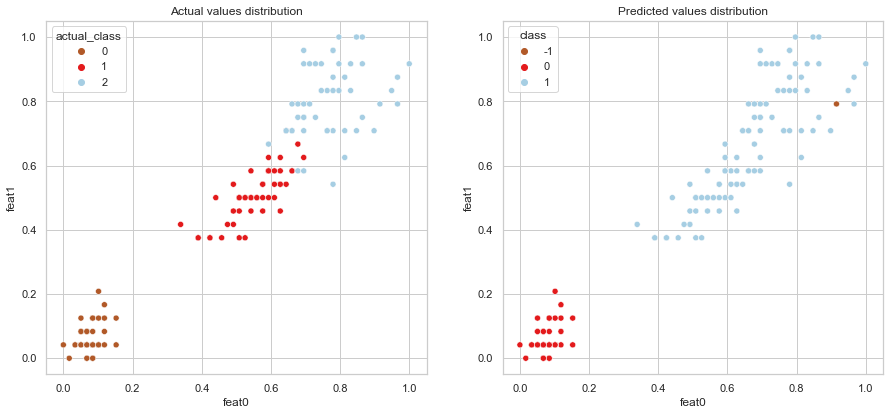

In [9]:
fig, ax = plt.subplots(1,2, figsize = (15, 6.5))

ax[0].set_title("Actual values distribution")
sns.scatterplot(df["feat0"], df["feat1"], df["actual_class"], palette = "Paired_r", ax=ax[0])

ax[1].set_title("Predicted values distribution")
sns.scatterplot(df["feat0"], df["feat1"], df["class"], palette = "Paired_r", ax=ax[1])
plt.show()

Since we used some random parameters in our first DBSCAN, the algorithm is not too efficient. In the IRIS dataset we clearly have 3 different classes while until now, the db recognized 2 clusters and 1 outlier (-1). 

As previously said we can identify the eps in a more accurate form, that is using the NearestNeighbors from sklearn.

In [10]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [11]:
for i in range(10):
    print("Points: {}".format(indices[i]), end = "; ")
    print("Distance: {}".format(distances[i]), )

Points: [ 0 27]; Distance: [0.         0.03254042]
Points: [ 1 25]; Distance: [0.         0.04382579]
Points: [ 2 47]; Distance: [0.         0.03254042]
Points: [ 3 47]; Distance: [0.         0.04498205]
Points: [ 4 37]; Distance: [0.        0.0500771]
Points: [ 5 16]; Distance: [0.         0.06779661]
Points: [ 6 11]; Distance: [0.        0.0772763]
Points: [ 7 39]; Distance: [0.         0.02777778]
Points: [ 8 38]; Distance: [0.         0.04498205]
Points: [ 9 34]; Distance: [0.         0.04166667]


Now that we have all the distances properly listed, we can plot the values to find the ideal value for epsilon which can be find at the maximum curvature of the line in the graph

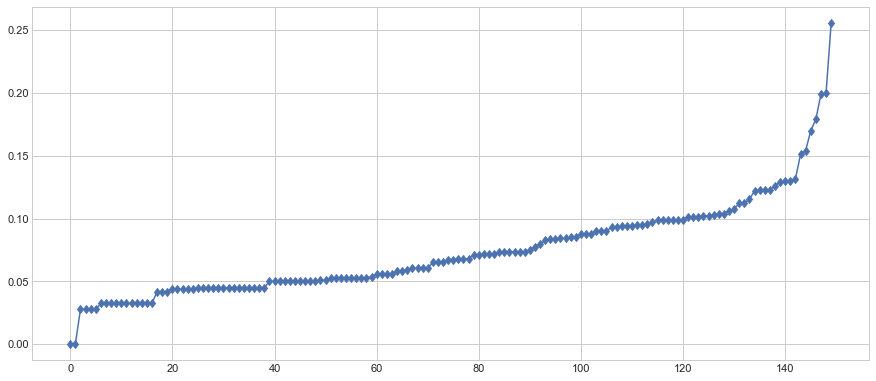

The ideal value for epsilon can be located between 0.12 and 0.14


In [12]:
distances = np.sort(distances, axis = 0)
dist = distances[:, 1]


fig = plt.figure(figsize = (15, 6.5))
plt.style.use("seaborn-whitegrid")
plt.plot(dist, "b-d")
plt.show()

print("The ideal value for epsilon can be located between 0.12 and 0.14")

Now we just need to insert the param in our dbscan and make few attempts to obtain the best result:

In [13]:
df1 = pd.DataFrame()
df1["feat0"] = X1[:, 2]
df1["feat1"] = X1[:, 3]

df1["actual_class"]  = y

In [14]:
df1.head()

,feat0,feat1,actual_class
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


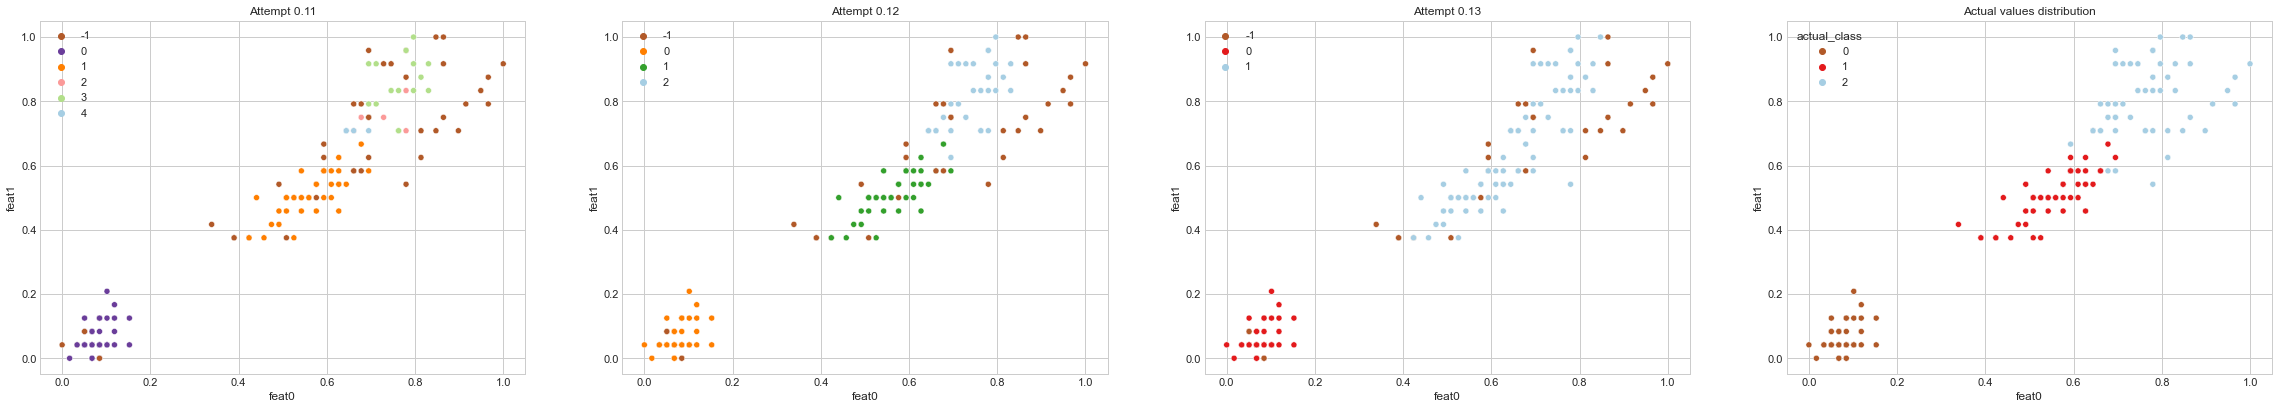

In [15]:
fig, ax = plt.subplots(1,4, figsize = (40, 6.5))

labels = []
for index, eps in enumerate(np.linspace(0.11, 0.13, 3)):
    db = DBSCAN(eps = eps, min_samples = 5).fit(X1)
    labels.append(db.labels_)
    
    df1["class{}".format(index)] = labels[-1]
    ax[index].set_title("Attempt {}".format(eps))
    sns.scatterplot(x =df1["feat0"], y = df1["feat1"], hue = labels[-1], ax=ax[index], palette = "Paired_r")
ax[3].set_title("Actual values distribution")   
sns.scatterplot(x =df1["feat0"], y = df1["feat1"], hue = df1["actual_class"], ax=ax[3], palette = "Paired_r")
plt.show()

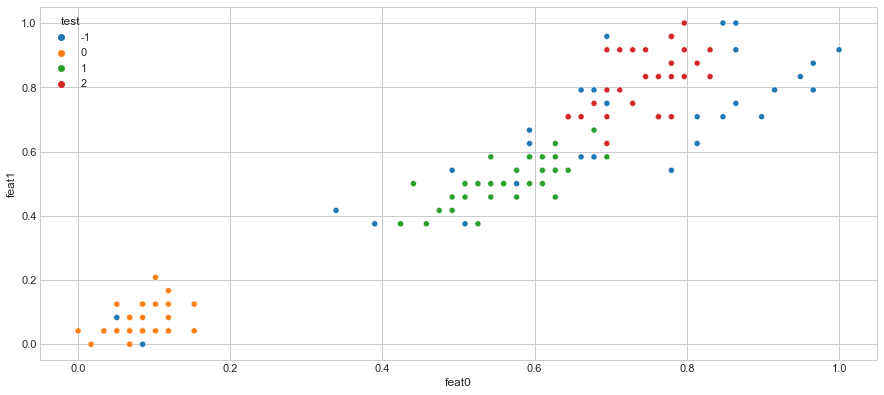

In [16]:
db2 = DBSCAN(eps = 0.12, min_samples = 5).fit(X1)
df1["test"] = db2.labels_
fid = plt.figure(figsize=(15, 6.5))
sns.scatterplot(x=df1["feat0"], y = df1["feat1"], hue = df1["test"], palette = "tab10")
plt.show()

See how DBSCAN without specifying the number of clusters to identify, properly discover the relationship between points and organize them as separate groups.

In the above plot we can see 3 distinct clusters, plus a fourth group for the outliers. 

Ideally we could now work on the "anomalies" to discover the closest group of belonging.

___